# Preliminary analysis: Mobility

Here we explore the google mobility data in the timerange of the uefa2020 championship. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sys

sys.path.append("../")
sys.path.append("../covid19_inference")

import covid19_soccer
import covid19_inference.data_retrieval as cov19data

# Matplotlib configs
from header_plotting import *

In [3]:
%load_ext autoreload
%autoreload 2

## Configs

In [4]:
country = "France"
keys = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]

## Download data

In [5]:
#Mobility
mobility = cov19data.GOOGLE(True)
df = mobility.data
df = df.reset_index()

INFO     [covid19_inference.data_retrieval.retrieval] Successfully downloaded Google.csv.gz to /tmp/covid19_data/.
INFO     [covid19_inference.data_retrieval.retrieval] Local backup to /tmp/covid19_data/Google.csv.gz successful.


In [6]:
#Games
dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])

## Define intervals

In [7]:
interval_soccer = []
interval_soccer.append(np.array(dl.date_of_games[dl.alpha_prior[0,:]>0])[0])
interval_soccer.append(np.array(dl.date_of_games[dl.alpha_prior[0,:]>0])[-1])

interval_soccer = pd.to_datetime(interval_soccer)
interval_base = pd.to_datetime([datetime.datetime(2021,9,19),datetime.datetime(2021,10,16)])

## Extract country from mobility data

In [8]:
df_country = df[df.country.str.contains(country)][df.state.isna()]
df_country = df_country.set_index("date")

/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Calculate estimates

In [9]:
mean_ws, median_ws, variance_ws = [],[],[]
mean_wb, median_wb, variance_wb = [],[],[]

for key in keys:
    obs_soccer = df_country[interval_soccer[0]:interval_soccer[1]][key]
    obs_base = df_country[interval_base[0]:interval_base[1]][key]

    mean_ws_temp, median_ws_temp, variance_ws_temp = [],[],[]
    mean_wb_temp, median_wb_temp, variance_wb_temp = [],[],[]
    
    for weekday in range(7):
        obs_soccer_temp = obs_soccer[obs_soccer.index.weekday == weekday]
        obs_base_temp = obs_base[obs_base.index.weekday == weekday]
           
        # Means
        mean_ws_temp.append(np.mean(obs_soccer_temp))
        mean_wb_temp.append(np.mean(obs_base_temp))

        # Median
        median_ws_temp.append(np.median(obs_soccer_temp))
        median_wb_temp.append(np.median(obs_base_temp))

        # Variance
        variance_ws_temp.append(np.var(obs_soccer_temp))
        variance_wb_temp.append(np.var(obs_base_temp))
    mean_ws.append(mean_ws_temp)
    mean_wb.append(mean_wb_temp)

    # Median
    median_ws.append(median_ws_temp)
    median_wb.append(median_wb_temp)

    # Variance
    variance_ws.append(variance_ws_temp)
    variance_wb.append(variance_wb_temp)


INFO     [numexpr.utils] NumExpr defaulting to 8 threads.


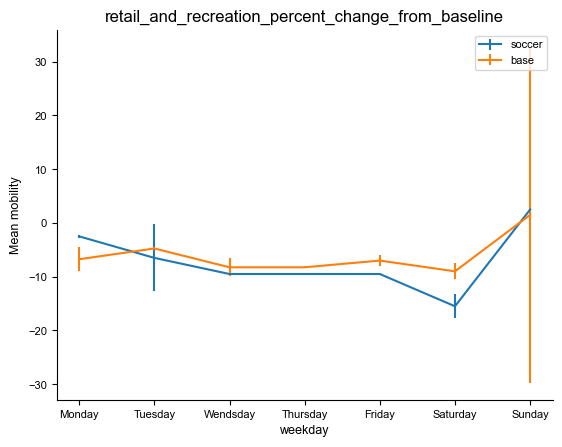

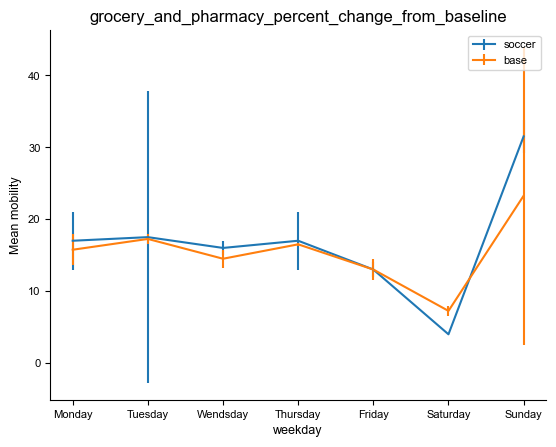

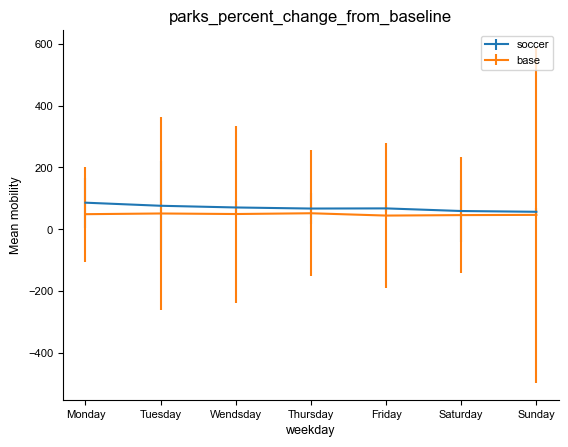

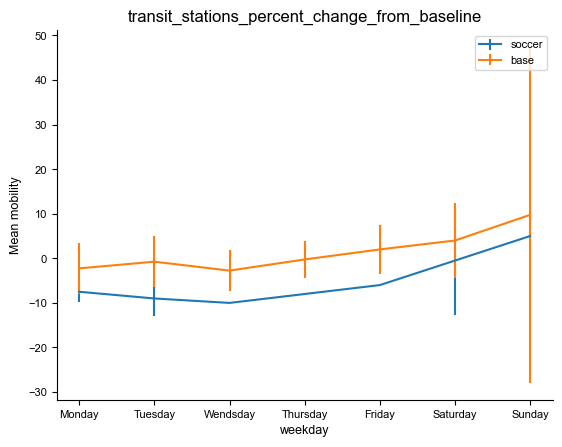

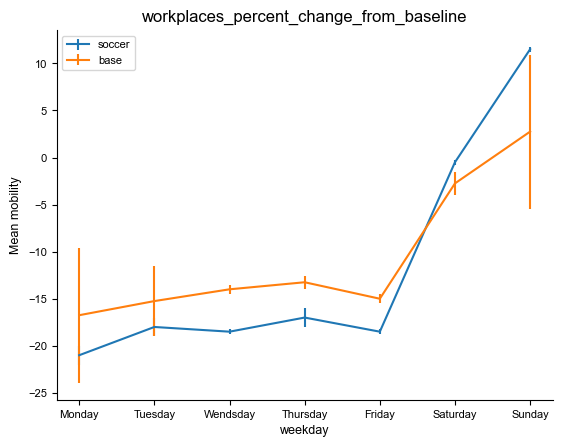

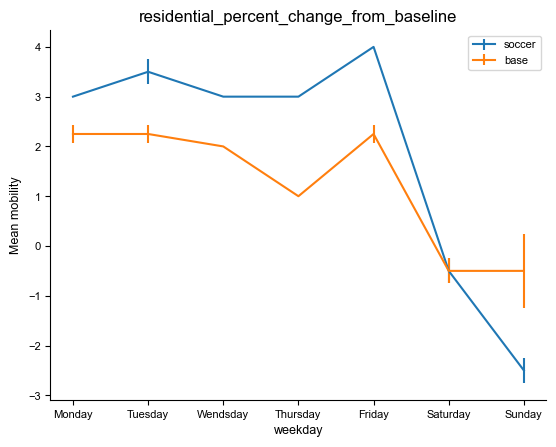

In [10]:
x = ["Monday","Tuesday","Wendsday","Thursday","Friday","Saturday","Sunday"]
for k,key in enumerate(keys):
    plt.errorbar(
        x=x,
        y=np.array(mean_ws)[k,:],
        yerr=np.array(variance_ws)[k,:],
        label="soccer"
    )
    plt.errorbar(
        x=x,
        y=np.array(mean_wb)[k,:],
        yerr=np.array(variance_wb)[k,:],
        label="base"
    )
    plt.title(key)
    plt.xlabel("weekday")
    plt.ylabel("Mean mobility")
    plt.legend()
    plt.show()